<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_1_Introduction_to_Feed_Forward_Neural_Networks_(FFNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1. Introduction to Feed Forward Neural Networks (FFNN)

## 1. Transition from Perceptron to Feed Forward Neural Networks (FFNN)


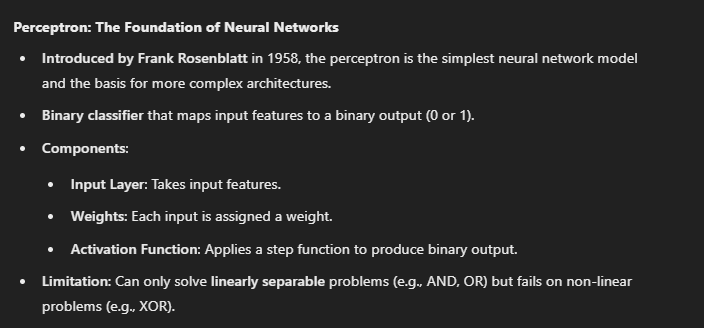

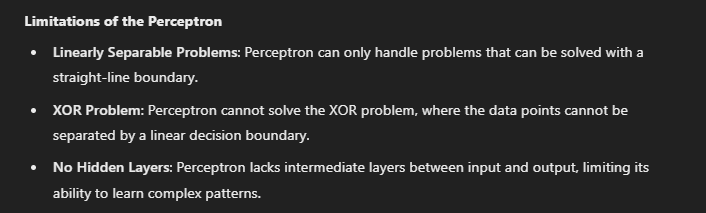

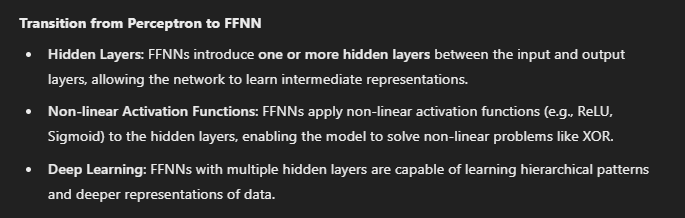

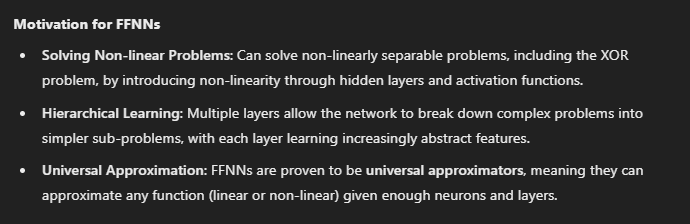

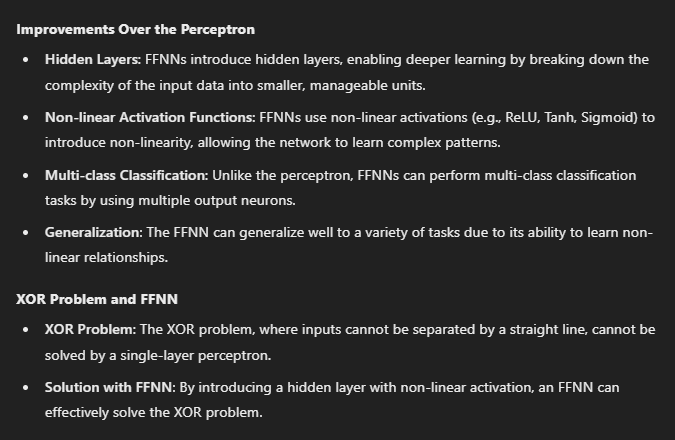

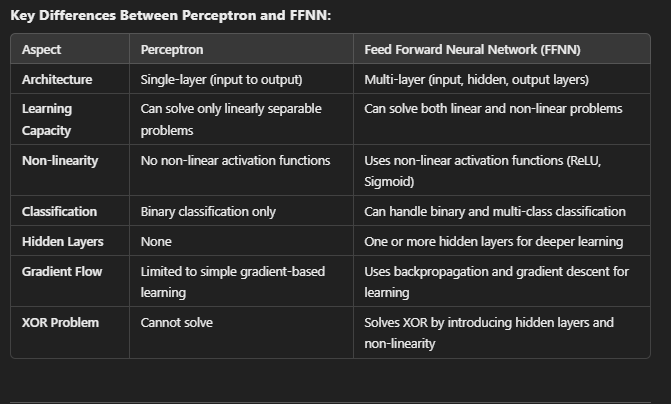

## 2. Key Concepts of Feed Forward Neural Networks


### 1.1 Input, Hidden, and Output Layers


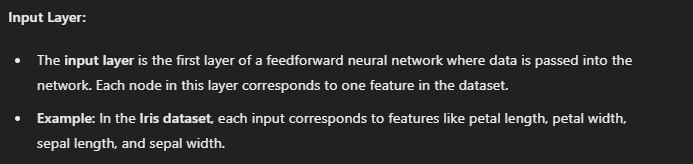

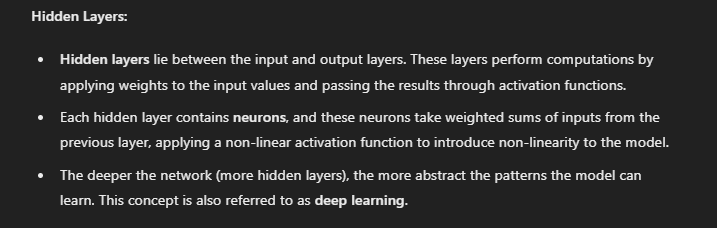

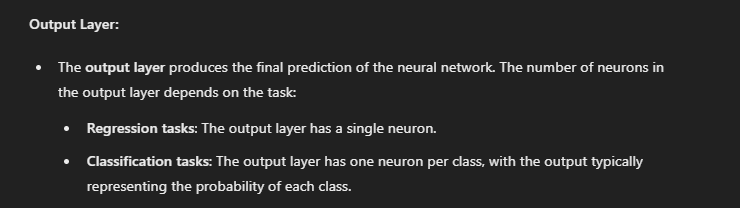

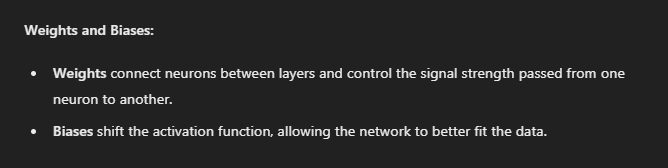

### 1.2 Forward Propagation


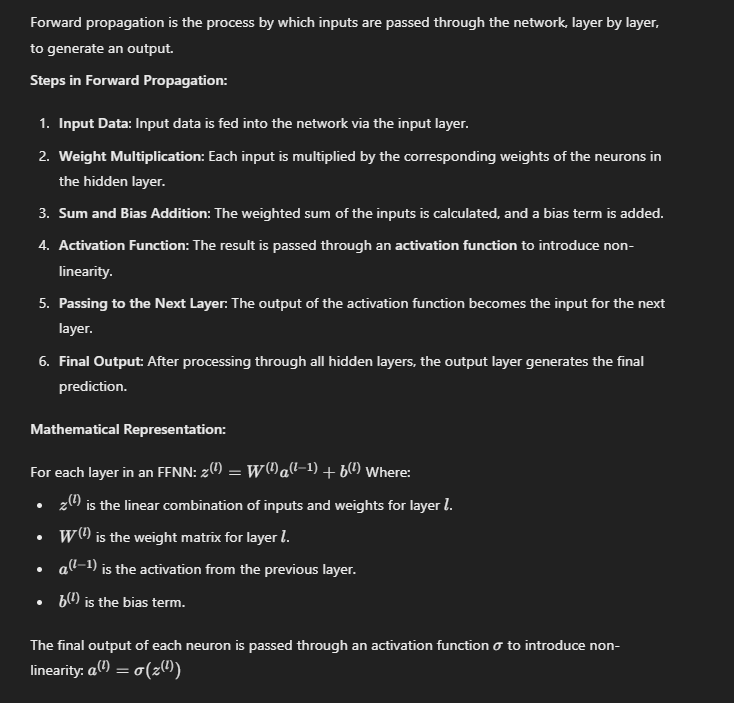

### 1.3 Activation Functions


Activation functions play a critical role in introducing non-linearity into the neural network. Without activation functions, the entire FFNN would behave like a linear model, irrespective of the number of layers.



#### Common Activation Functions:


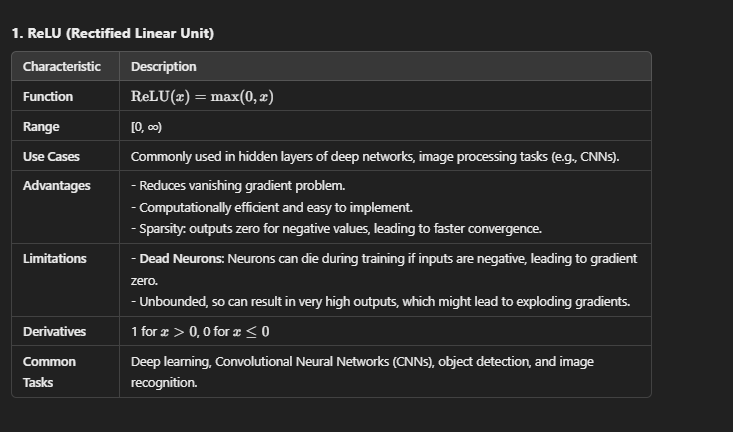

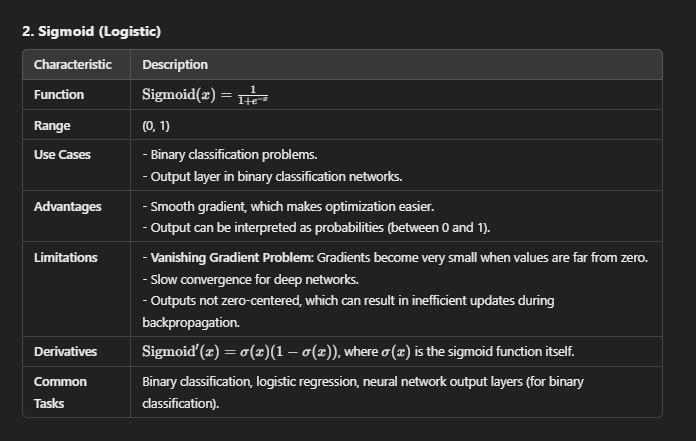

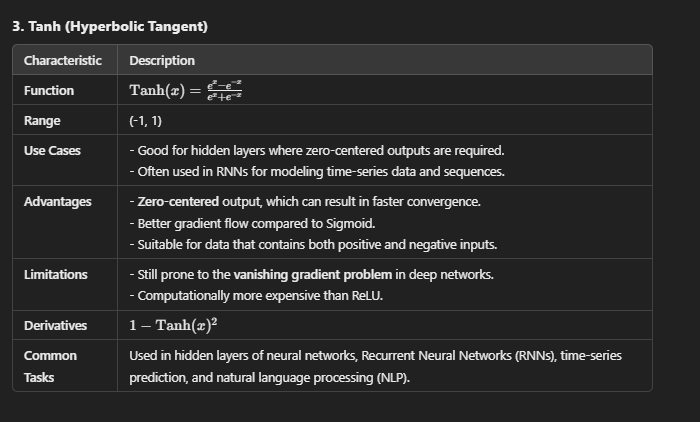

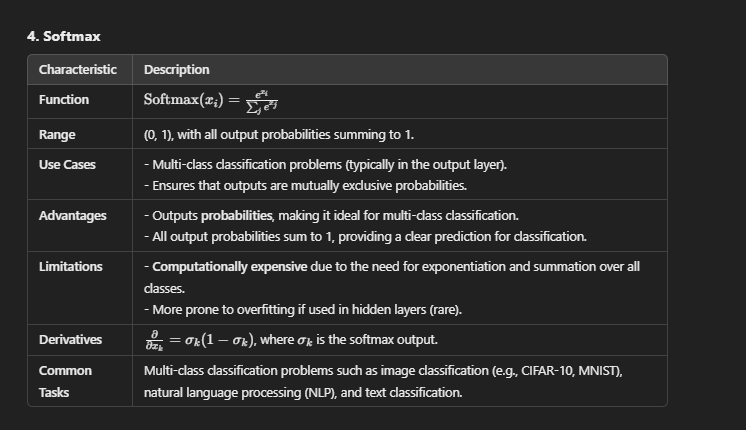

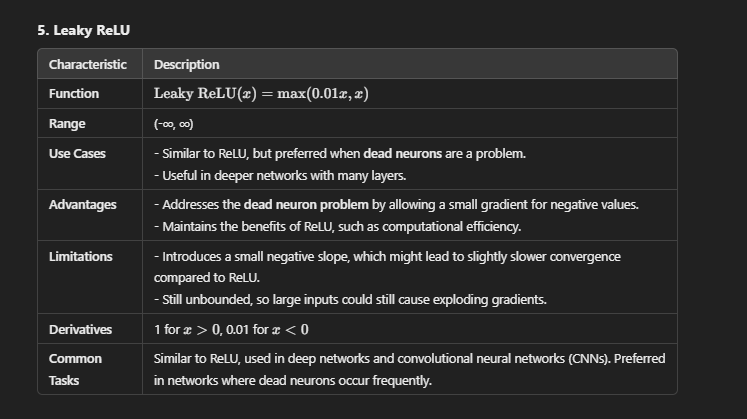

#### Comparsion Summery


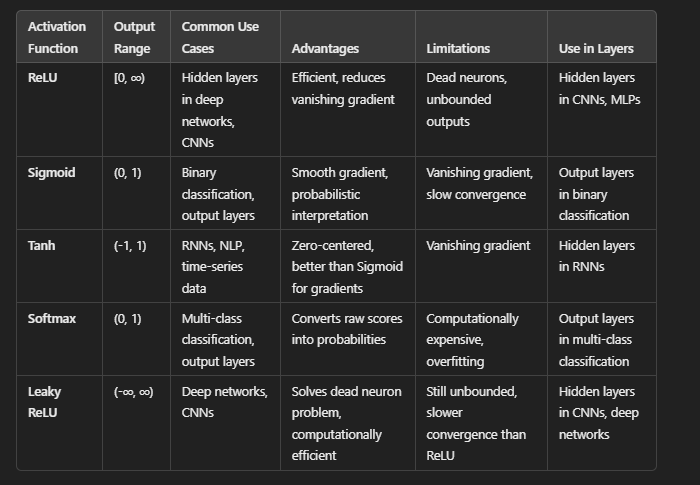

## 2. Practical Example: Building a Simple FFNN


**A simple Feed Forward Neural Network (FFNN) using the Iris dataset**

- Iris dataset: Consists of 150 instances, with each instance having four input features. The goal is to classify the instance into one of three classes: Iris-setosa, Iris-versicolor, or Iris-virginica.

- Model Architecture:
  - Input Layer: 4 neurons (one for each feature).
  - Hidden Layer: A fully connected hidden layer with 10 neurons and the ReLU activation function.
  - Output Layer: 3 neurons with Softmax activation for multi-class classification.

### 1. Dataset Preparation


#### 1.1 Dataset Overview


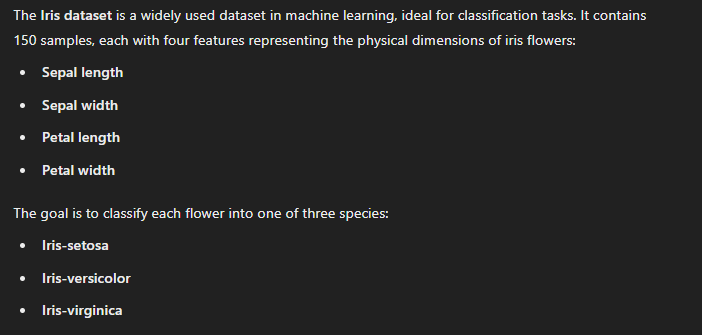

#### 1.2 One-Hot Encoding


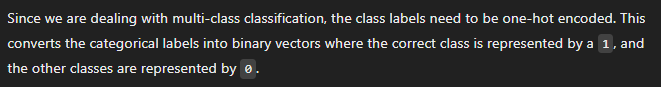

#### 1.3 Train-Test Split


We split the dataset into a training set (80% of the data) and a test set (20%) to train and evaluate the model.



In [1]:
# Import required libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target.reshape(-1, 1)  # Labels: Iris-setosa, Iris-versicolor, Iris-virginica

# One-hot encode the labels
# The target labels in the Iris dataset are categorical (e.g., 0, 1, 2),
# where 0 represents Iris-setosa, 1 represents Iris-versicolor, and 2 represents Iris-virginica.
# Machine learning models require labels to be in a format suitable for classification.
# Since this is a multi-class classification problem, one-hot encoding is used to transform # the categorical labels into binary vectors.
# For example, if the label is 1 (Iris-versicolor), it will be converted into [0, 1, 0].

encoder = OneHotEncoder(sparse=False)  # Initialize the OneHotEncoder object from scikit-learn.
  # 'sparse=False' ensures that the output is a dense array rather
  # than a sparse matrix (the default setting is True in some versions).

y = encoder.fit_transform(y)  # 'fit_transform' learns the unique classes and applies the one-hot encoding to the labels.
  # The output is a matrix where each row represents a one-hot encoded vector
  # corresponding to a specific class label. For instance:
  # If the label was 0, the output becomes [1, 0, 0].
  # If the label was 1, the output becomes [0, 1, 0].
  # If the label was 2, the output becomes [0, 0, 1].


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 2. Model Architecture


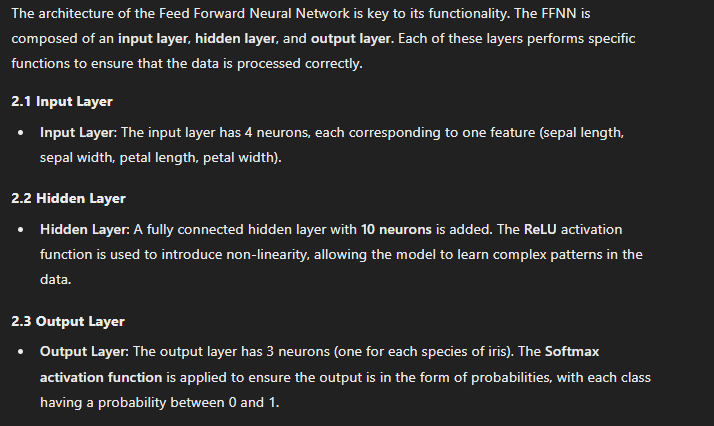

In [2]:
# Build the Feed Forward Neural Network (FFNN) model using Keras
model = tf.keras.models.Sequential()

# Add a fully connected hidden layer with 10 neurons and ReLU activation
model.add(tf.keras.layers.Dense(10, input_dim=4, activation='relu'))

# Add the output layer with 3 neurons (one per class) and Softmax activation
model.add(tf.keras.layers.Dense(3, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Explanation:**

  - Dense(10, activation='relu'): A fully connected layer with 10 neurons. The ReLU activation introduces non-linearity, enabling the network to learn complex relationships.

  - Dense(3, activation='softmax'): The output layer has 3 neurons corresponding to the 3 classes, with Softmax providing a probability distribution over these classes.

### 3. Model Compilation


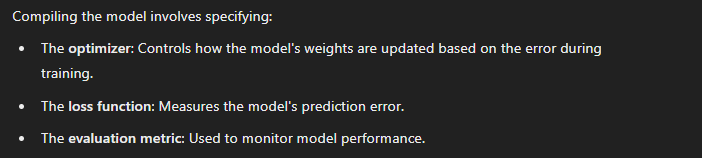

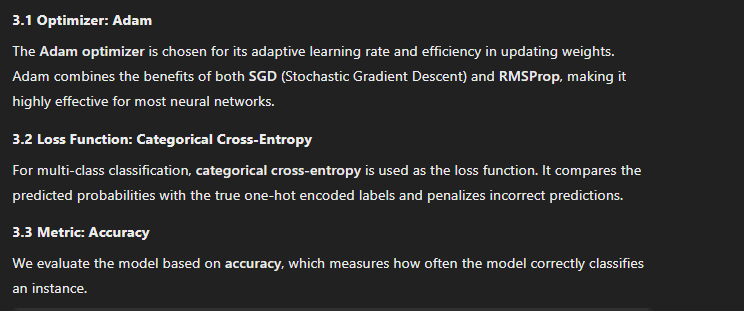

In [3]:
# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Explanation:

  - optimizer='adam': Uses Adam for efficient training.
  - loss='categorical_crossentropy': Appropriate for multi-class classification problems.
  - metrics=['accuracy']: The model will report accuracy during training and evaluation.

### 4. Model Training


We train the model on the training set using the specified number of epochs and batch size. Each epoch represents one complete pass through the dataset, and the batch size controls how many samples are processed before updating the model's weights.



#### 4.1 Epochs and Batch Size


  - Epochs: We train for 50 epochs, meaning the model will go through the entire dataset 50 times to learn the relationships.
  - Batch Size: A batch size of 8 means the model processes 8 samples before updating the weights, balancing computational efficiency and learning speed.

In [7]:
# Train the model for 50 epochs with a batch size of 8
# history: A variable to store the training history, including loss and accuracy over each epoch.

# model.fit: The method used to train the model.
# X_train: The training data (features) that will be used as input during training.
# y_train: The corresponding labels for the training data (target).
# epochs=50: The number of complete passes through the training dataset. The model will see the entire dataset 50 times.
# batch_size=8: The number of samples processed before the model's internal parameters (weights) are updated.
# - A smaller batch size results in more frequent weight updates, but it can also lead to noisier updates.
# validation_data=(X_test, y_test): During training, the model will evaluate its performance on the validation data (X_test and y_test) after each epoch. This helps to monitor how well the model is generalizing to unseen data and prevents overfitting.
# - The validation data is not used for training, but it helps assess the model's performance after each epoch.
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


#Note:
# - The line batch_size=8 means that the model processes 8 samples at a time from the training dataset before it updates its internal parameters (weights). In other words, after processing 8 data points (samples), the model will compute the loss (how well or poorly it performed) and then adjust its weights based on the calculated gradients. This happens repeatedly until the model completes processing all the data in the dataset for one epoch.

# - Larger batch sizes lead to fewer but more stable weight updates (since the gradients are computed over more data points), while smaller batch sizes lead to more frequent weight updates that may be noisier but can lead to faster convergence in some cases.


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9863 - loss: 0.1534 - val_accuracy: 0.9667 - val_loss: 0.1673
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.1534 - val_accuracy: 0.9667 - val_loss: 0.1664
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9666 - loss: 0.1699 - val_accuracy: 0.9667 - val_loss: 0.1667
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.1386 - val_accuracy: 0.9667 - val_loss: 0.1649
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9942 - loss: 0.1311 - val_accuracy: 0.9667 - val_loss: 0.1636
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9888 - loss: 0.1492 - val_accuracy: 0.9667 - val_loss: 0.1632
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.1335 - val_accuracy: 0.9667 - val_loss: 0.1616
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9692 - loss: 0.1676 - val_accuracy: 0.9667 - val_loss:

**==> Do we really need to feed validation_data=(X_test, y_test) while training?**

No, you do not absolutely need to provide validation_data=(X_test, y_test) during training. However, using a validation set during training offers several important benefits that help in building a robust model. Let's break this down and discuss how the fit() function uses the validation data and why it can be useful.



==> Why Use Validation Data During Training?


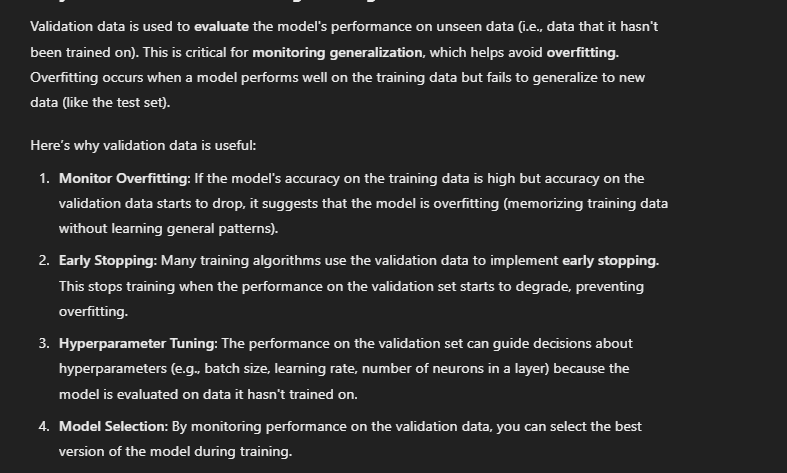

==> How the fit() Function Uses Validation Data


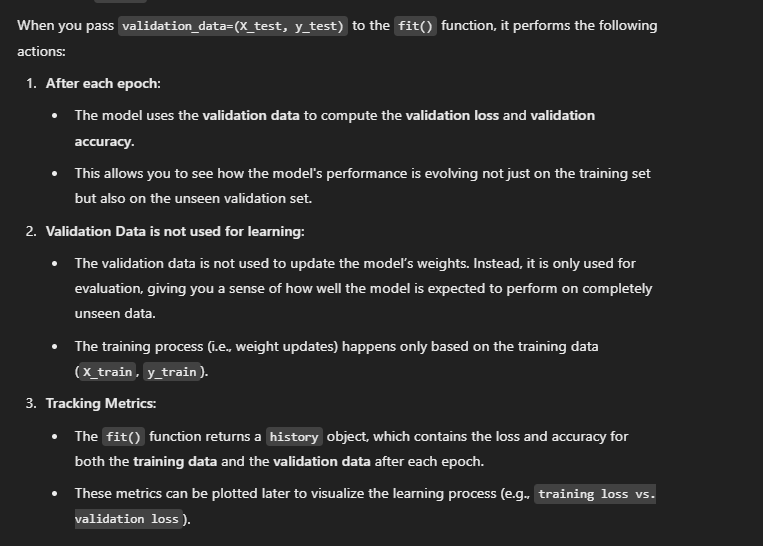

==> Do We Really Need Validation Data?


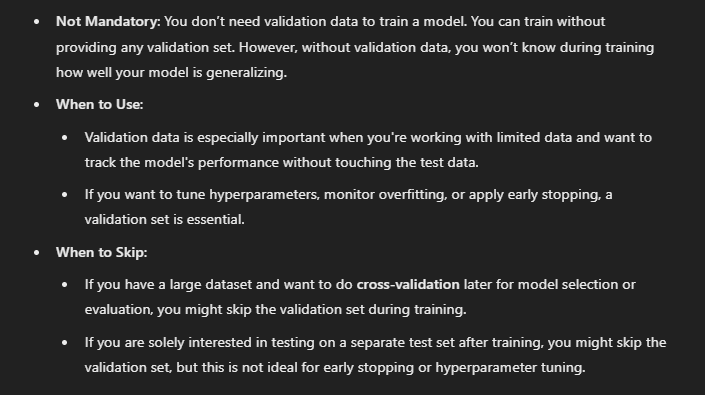

==> What Happens Without Validation Data?


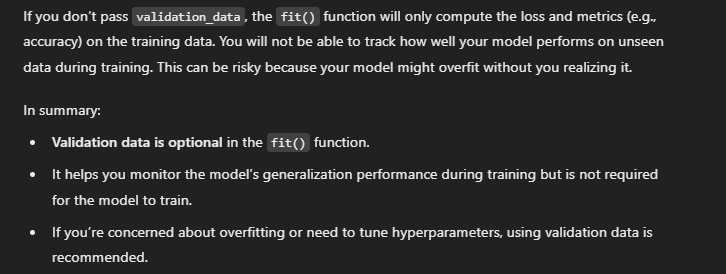

==> Learning rate in FFNN?

In the implementation of the **Feed Forward Neural Network (FFNN)** provided earlier, the **learning rate** is applied through the **optimizer**. Specifically, in the following code, the learning rate is handled by the **Adam optimizer**, which is part of the Keras/TensorFlow library.

```python
# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

In this case, we are using **Adam** as the optimizer. The **Adam optimizer** has a default learning rate, but you can also specify a custom learning rate when initializing the optimizer.

**Where Learning Rate is Applied:**

The **learning rate** is applied in the **Adam optimizer** function. Adam is an adaptive optimizer that adjusts the learning rate based on the past gradients, and it uses the learning rate to control the size of the weight updates during backpropagation.

By default, Adam uses a learning rate of **0.001**, but you can customize it when defining the optimizer like this:

** Specifying a Custom Learning Rate in Adam:**
```python
# Define the Adam optimizer with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model with the custom Adam optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
```


==> back propogation in the above implementation ?

Yes, **backpropagation** is used in the code you've provided for training the **Feed Forward Neural Network (FFNN)**.

Here's why:

** Key Points in Your Code That Indicate Backpropagation is Used:**

1. **Model Compilation**:
   ```python
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   ```
   - You are using **Adam** as the optimizer, which is an extension of **Stochastic Gradient Descent (SGD)** that includes momentum and adaptive learning rates.
   - Adam (and SGD) requires **backpropagation** to compute the gradients of the loss function with respect to the model's weights and adjust the weights accordingly.
   - **Categorical cross-entropy** is the loss function, and its gradients are calculated and propagated backward through the network to minimize the loss.

2. **Model Training**:
   ```python
   history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))
   ```
   - During the **training process**, the network performs forward propagation to compute predictions, then calculates the loss.
   - After each batch, the **backpropagation** algorithm is used to compute the gradients of the loss with respect to each weight.
   - These gradients are then used by the optimizer (Adam in this case) to update the weights and improve the model's performance.

** How Backpropagation Works in This Code:**

- **Forward Pass**: In each epoch, the input data (`X_train`) is passed through the network, and predictions are generated by applying the weights and activations. The loss is computed using the categorical cross-entropy loss function.
  
- **Backward Pass (Backpropagation)**: Once the loss is computed, **backpropagation** is used to calculate the gradients of the loss with respect to each weight in the network. These gradients indicate the direction in which each weight should be adjusted to reduce the loss.

- **Weight Update**: The **Adam optimizer** uses these gradients to update the model’s weights in the direction that minimizes the loss. This process happens iteratively over each epoch and batch of training data.


### 5. Model Evaluation


Once training is complete, we evaluate the model's performance on the test set to see how well it generalizes to unseen data.



In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9667 - loss: 0.1126
Test Loss: 0.1126
Test Accuracy: 0.9667


#### 5.1 Test Accuracy


The test accuracy is the proportion of correctly classified instances on the test set. A high test accuracy indicates that the model has successfully learned the underlying patterns in the data.



# Observations

### Difference between Sparce matrix and Dense matrix and what is the difference between the uses of these in machine elarning algorithms?

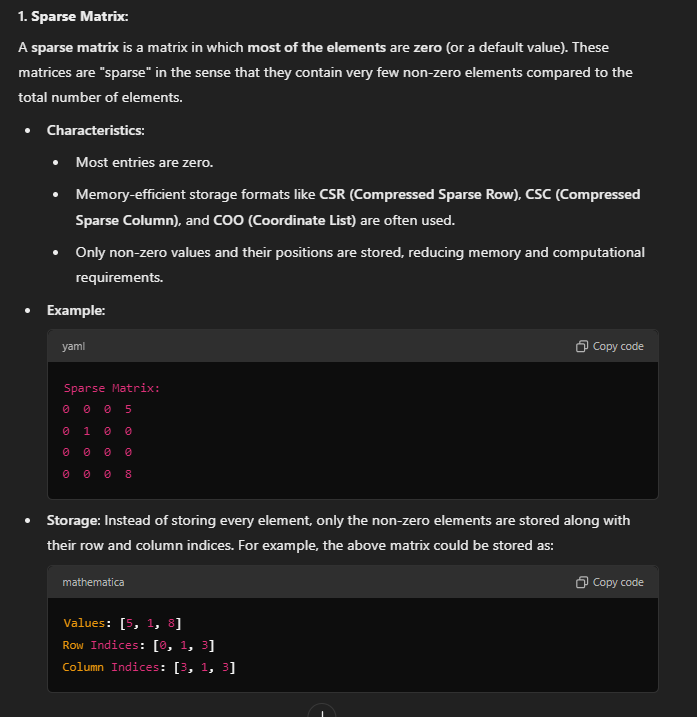

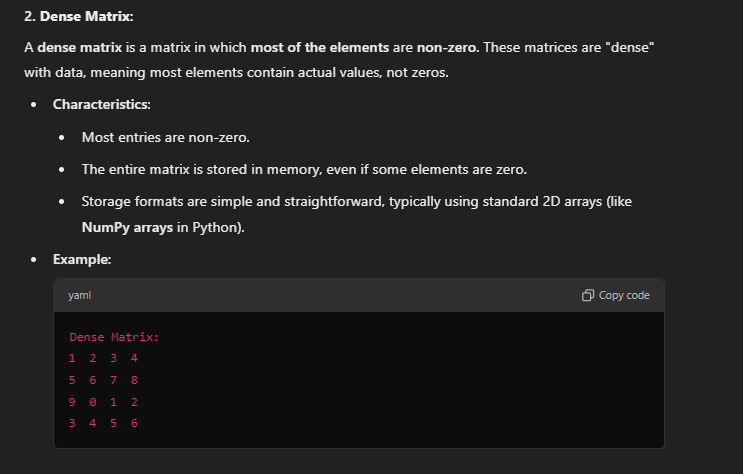

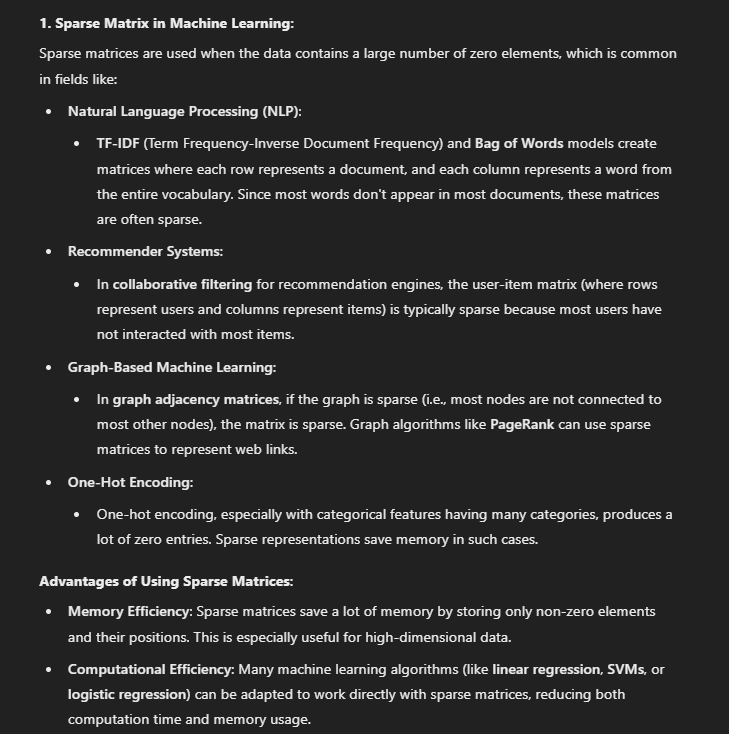

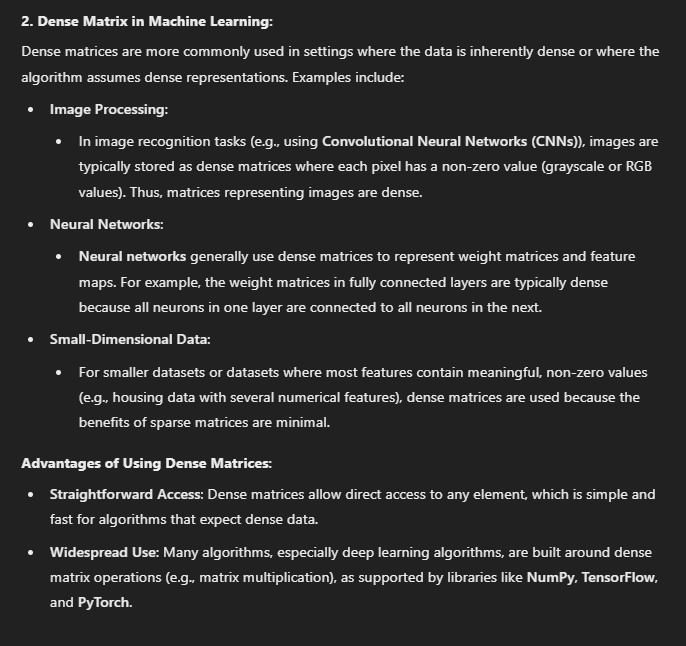

==> Differences in Usage of Type of Matrices Across Machine Learning Algorithms


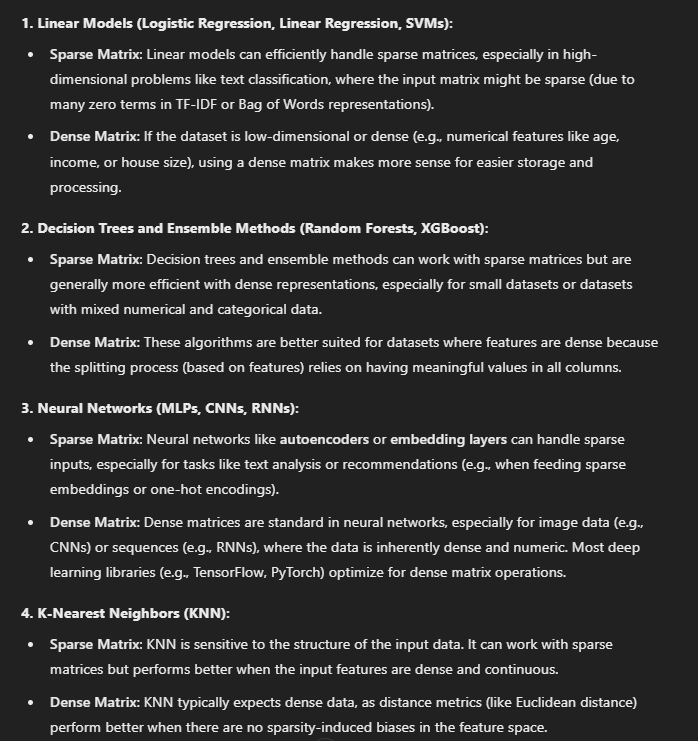

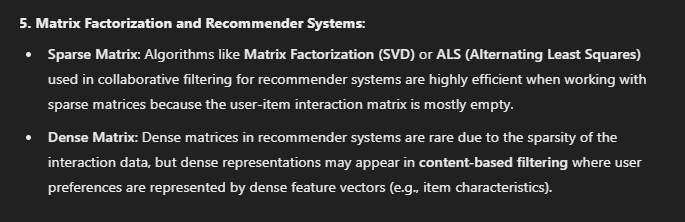

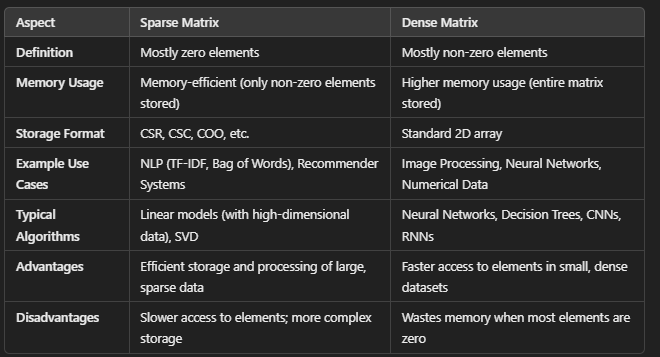

### Why is it important to have a hidden layer in an FFNN, and how does it contribute to the model’s ability to learn non-linear patterns?

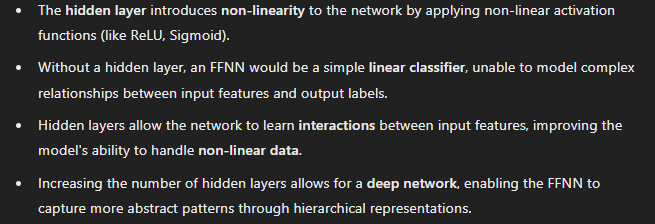

### How do the number of hidden neurons affect the FFNN’s performance, and what are the trade-offs between too few and too many hidden neurons?

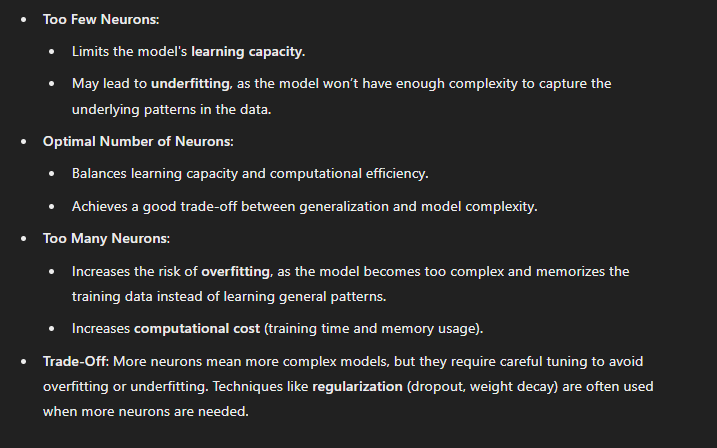

### What would happen if we removed the activation function during forward propagation in FFNN? Would the network still be able to learn non-linear functions?

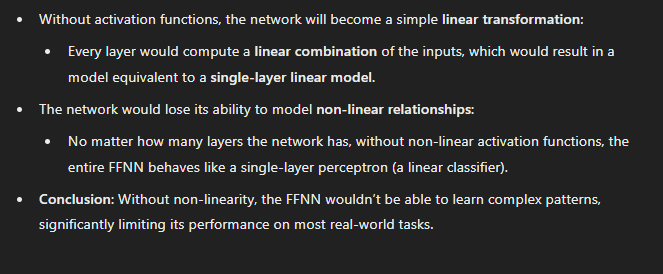

Additional Observations:


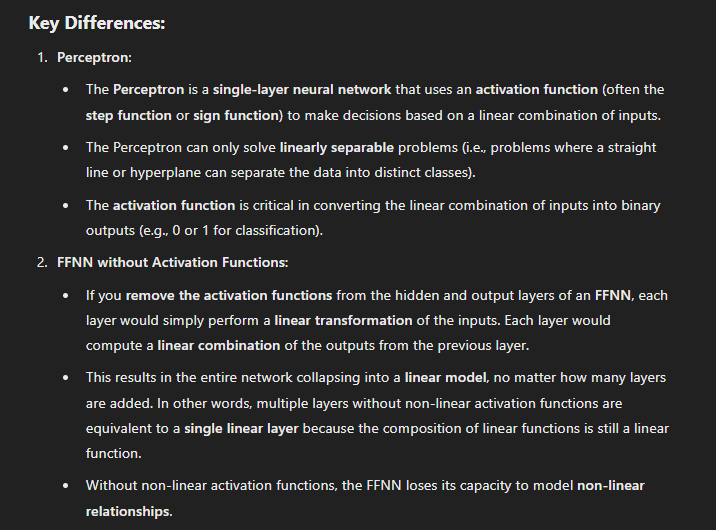

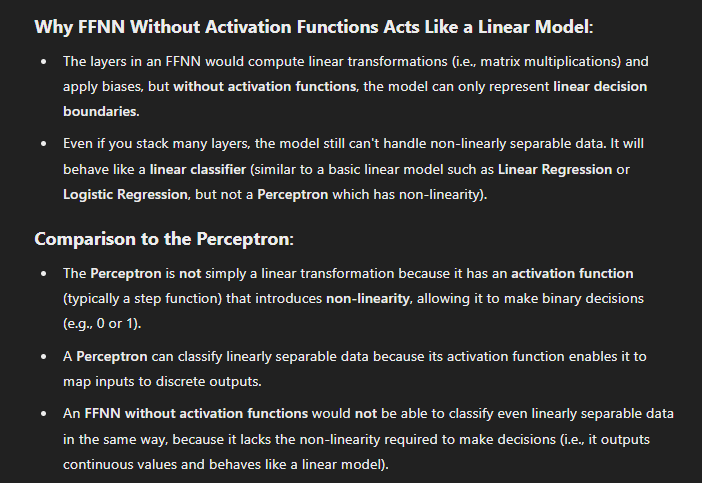

### How does the forward propagation mechanism change if we increase the depth of the network significantly?

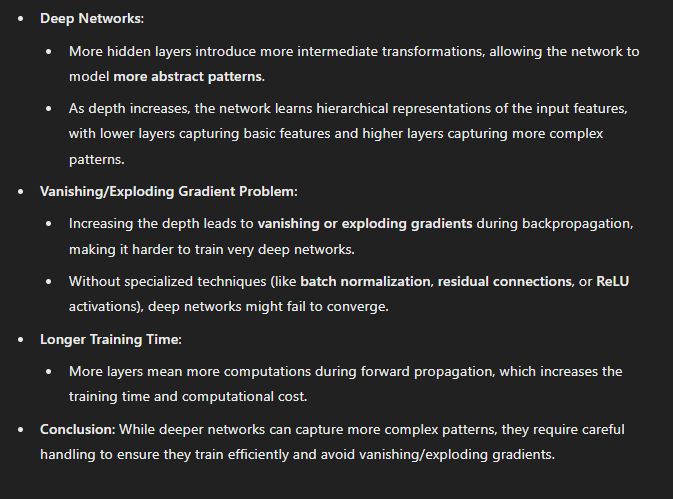

### How would the performance of an FFNN change if we used Sigmoid activation in all layers instead of ReLU? How does the vanishing gradient problem affect FFNNs when using Sigmoid?

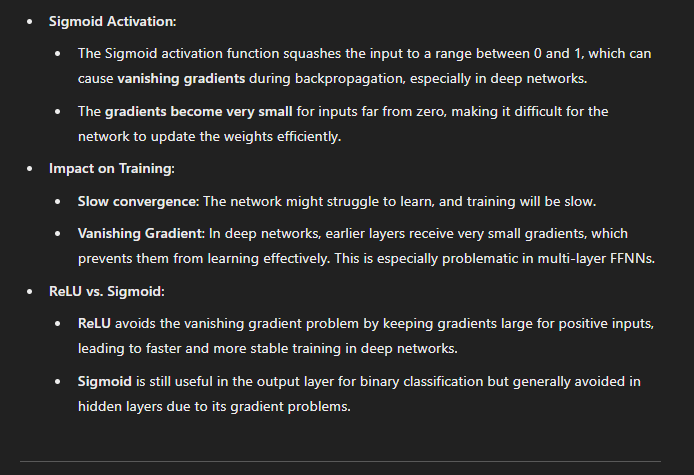

### Can an FFNN with ReLU activation in the hidden layers and Softmax in the output layer solve any classification problem? Why or why not?

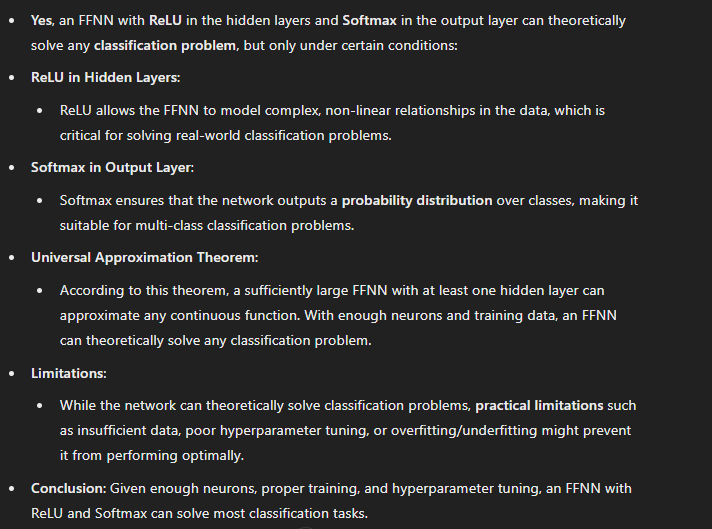

###  How does the choice of optimizer (e.g., Adam vs. SGD) impact the convergence speed of an FFNN, especially in deep networks?

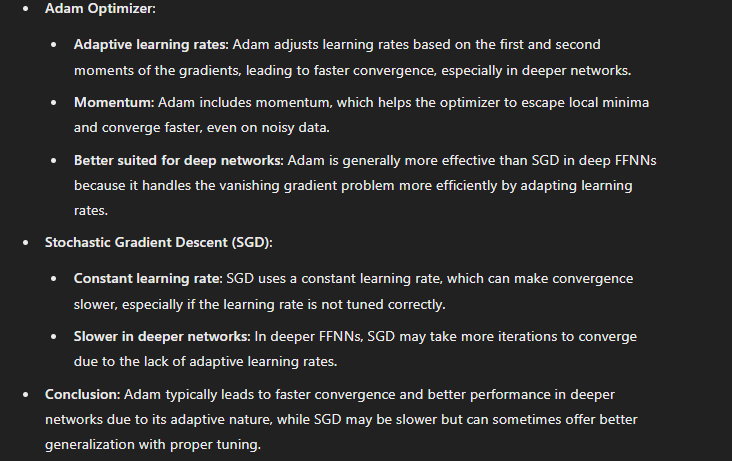

### What role does learning rate play in the success of an FFNN, and how could improper learning rates lead to poor performance or failure in training?

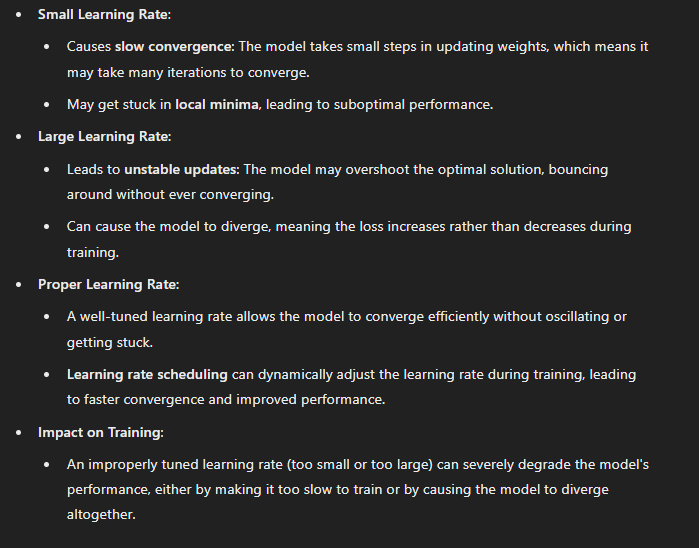